
# Código para executar regressão logística

# Declaração do problema

De acordo com a Organização Mundial da Saúde (OMS) o AVC é a 2ª causa de morte no mundo, responsável por aproximadamente 11% do total de mortes.
Esse conjunto de dados é usado para prever se um paciente provavelmente sofrerá AVC com base nos parâmetros de entrada, como sexo, idade, várias doenças e tabagismo. Cada linha nos dados fornece informações relevantes sobre o paciente.

Entradas: 
- Gênero 
- Idade
- Hipertensão
- Doença cardíaca
- Casado alguma vez
- Tipo de trabalho
- Tipo de residência
- Nível médio de glicose
- Índice de massa corporal
- Fumante

Saídas:
- AVC (1: teve AVC, 0: Não teve AVC)

# IMPORTANDO AS BIBLIOTECAS

In [1243]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [1244]:
import warnings

warnings.filterwarnings('ignore')

# IMPORTANDO O DATASET

In [1245]:

dataset = pd.read_csv('stroke-data.csv')

# EXPLORANDO / VISUALIZANDO DADOS

In [1246]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [1247]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [1248]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [1249]:
dataset.duplicated().sum()

0

In [1250]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot: >

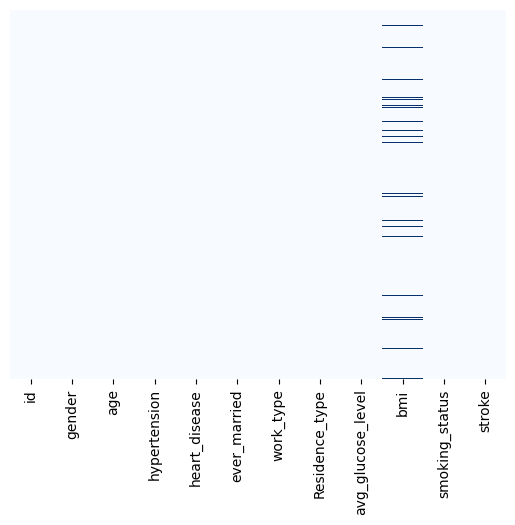

In [1251]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="Blues")

Text(0.5, 1.0, 'Alvo - Stroke')

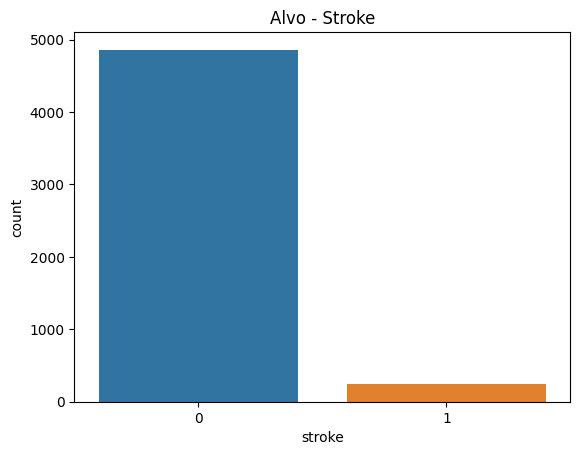

In [1252]:
sns.countplot(x=dataset['stroke'])
plt.title('Alvo - Stroke')

In [1253]:
stroke    = dataset[dataset['stroke']==1]
no_stroke = dataset[dataset['stroke']==0]


In [1254]:
print("Total =", len(dataset))

print("Numero de pessoas que tiveram derrame =", len(stroke))
print("Porcentagem de pessoas que tiveram derrame =", 1.*len(stroke)/len(dataset)*100.0, "%")
 
print("Não tiveram derrame =", len(no_stroke))
print("Porcentagem de pessoas que não tiveram derrame =", 1.*len(no_stroke)/len(dataset)*100.0, "%")

Total = 5110
Numero de pessoas que tiveram derrame = 249
Porcentagem de pessoas que tiveram derrame = 4.87279843444227 %
Não tiveram derrame = 4861
Porcentagem de pessoas que não tiveram derrame = 95.12720156555773 %


In [1255]:
from statistics import median
maleBmi = median(dataset.query('(gender == "Male")')['bmi'])
femaleBmi = median(dataset.query('(gender == "Female")')['bmi'])
print(f'mediana de bmi para genero masculino {maleBmi}')
print(f'mediana de bmi para genero feminino {femaleBmi}')

mediana de bmi para genero masculino 30.7
mediana de bmi para genero feminino 21.45


# PREPARANDO OS DADOS

In [1256]:
def fill_bmi(data):
    bmi = data[0]
    gender = data[1]

    if pd.isnull(bmi):
        if gender == 'Male': 
            return maleBmi
        else:
            return femaleBmi
    else:
        return bmi
        

In [1257]:
dataset['bmi'] = dataset[['bmi','gender']].apply(fill_bmi,axis=1)

<AxesSubplot: >

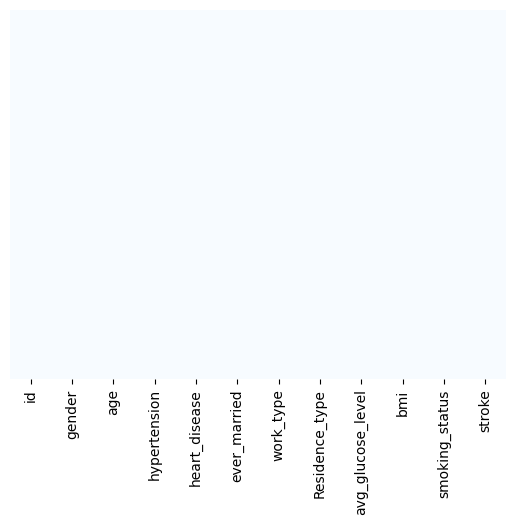

In [1258]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [1259]:
dataset.drop(['id'], axis=1, inplace=True)


In [1260]:
ever_married = pd.get_dummies(dataset['ever_married'], drop_first = True)
residence_type = pd.get_dummies(dataset['Residence_type'], drop_first = True)
gender = pd.get_dummies(dataset['Residence_type'], drop_first = True)
work_type = (dataset['work_type'].str.strip('[]')
                     .str.get_dummies(', ')
                     .rename(columns=lambda x: x.strip('"')))
smoking_status = (dataset['smoking_status'].str.strip('[]')
                     .str.get_dummies(', ')
                     .rename(columns=lambda x: x.strip('"')))                     
dataset.drop(['ever_married', 'Residence_type', 'gender', 'work_type', 'smoking_status'], axis=1, inplace=True)

dataset = pd.concat([dataset, ever_married, residence_type, gender, work_type, smoking_status], axis=1)
dataset = dataset.rename(columns={'Yes':'ever_married', 'Urban': 'residence_type', 'Male':'gender'})

In [1261]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                5110 non-null   float64
 5   stroke             5110 non-null   int64  
 6   ever_married       5110 non-null   uint8  
 7   residence_type     5110 non-null   uint8  
 8   residence_type     5110 non-null   uint8  
 9   Govt_job           5110 non-null   int64  
 10  Never_worked       5110 non-null   int64  
 11  Private            5110 non-null   int64  
 12  Self-employed      5110 non-null   int64  
 13  children           5110 non-null   int64  
 14  Unknown            5110 non-null   int64  
 15  formerly smoked    5110 non-null   int64  
 16  never smoked       5110 

In [1262]:
X = dataset

y = dataset['stroke']

In [1263]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['stroke'] = le.fit_transform(X['stroke'])

y = le.transform(y)

In [1265]:
# Aplicar técnica de subamostragem com RandomUnderSampler

from imblearn.under_sampling import RandomUnderSampler

oversample = RandomUnderSampler()
X,y=oversample.fit_resample(X,y)

<AxesSubplot: ylabel='count'>

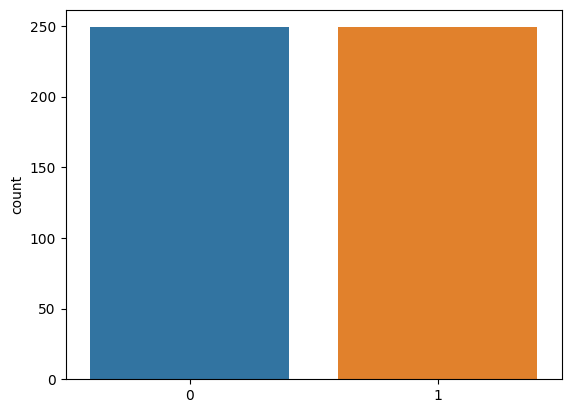

In [1266]:
sns.countplot(x=y)

In [1267]:
cols = X.columns

In [1268]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [1269]:
X = pd.DataFrame(X, columns=[cols])

# TREINAMENTO DO MODELO

In [1270]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)


kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [1271]:
kmeans.cluster_centers_


array([[ 6.73332376e-01,  1.64794007e-01,  1.27340824e-01,
         3.06874416e-01,  2.96021905e-01,  5.05617978e-01,
         7.41573034e-01,  1.00000000e+00,  1.00000000e+00,
         1.16104869e-01,  3.74531835e-03,  6.14232210e-01,
         2.02247191e-01,  6.36704120e-02,  2.32209738e-01,
         2.24719101e-01,  3.74531835e-01,  1.68539326e-01],
       [ 6.70552980e-01,  2.07792208e-01,  1.08225108e-01,
         2.94216608e-01,  2.96566979e-01,  4.93506494e-01,
         7.87878788e-01, -7.77156117e-16, -7.77156117e-16,
         1.12554113e-01,  2.16840434e-18,  6.19047619e-01,
         2.29437229e-01,  3.89610390e-02,  2.46753247e-01,
         2.25108225e-01,  3.93939394e-01,  1.34199134e-01]])

In [1272]:
kmeans.inertia_


1056.3526736718813

In [1273]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 246 out of 498 samples were correctly labeled.


In [1274]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))


Accuracy score: 0.49


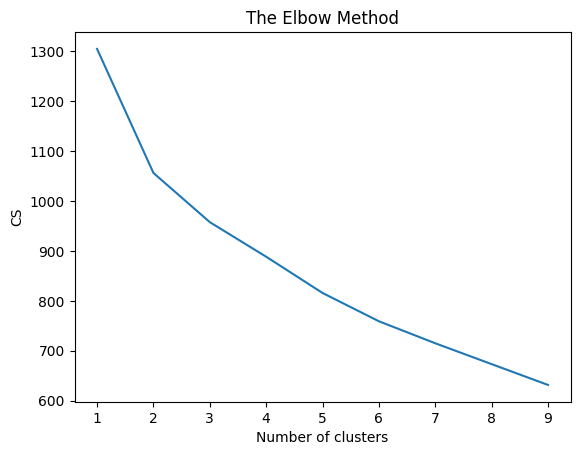

In [1275]:
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

# VISUALIZANDO OS resultados

Text(113.9222222222222, 0.5, 'predicted label')

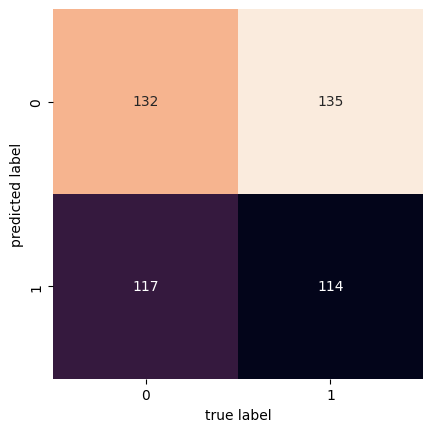

In [1276]:

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [1277]:
from sklearn.metrics import classification_report
print(classification_report(y, labels))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51       249
           1       0.49      0.46      0.47       249

    accuracy                           0.49       498
   macro avg       0.49      0.49      0.49       498
weighted avg       0.49      0.49      0.49       498

